<a href="https://colab.research.google.com/github/manishaachary13/Statistics_mid_assessment/blob/main/mid_Assessment_Applied_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the Excel dataset
file_path = '/content/drive/MyDrive/dataset/superstore marketing data.xlsx'  # Update with the correct path
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())

Mounted at /content/drive
      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWeb

In [2]:
# Check unique values or problematic rows
print(df['Dt_Customer'].unique())  # View unique values
print(df[df['Dt_Customer'].str.contains(r'[^\w\-\/:\s]', na=False)])  # Find rows with non-standard values


['6/16/2014' '6/15/2014' '5/13/2014' '########' '3/17/2014' '1/29/2014'
 '1/18/2014' '12/27/2013' '10/16/2013' '7/23/2013' '5/28/2013' '3/26/2013'
 '3/15/2013' '11/23/2012' '10/13/2012' '9/14/2012' '6/29/2014' '5/31/2014'
 '5/30/2014' '4/27/2014' '10/29/2013' '4/25/2013' '4/20/2013' '3/30/2013'
 '2/14/2013' '12/19/2012' '12/15/2012' '9/17/2012' '4/28/2014' '3/29/2014'
 '11/15/2013' '9/20/2013' '8/31/2013' '7/30/2013' '7/27/2013' '6/22/2013'
 '11/21/2012' '9/28/2012' '9/27/2012' '8/13/2012' '6/25/2014' '5/28/2014'
 '4/14/2014' '2/27/2014' '1/28/2014' '11/17/2013' '10/17/2013'
 '10/13/2013' '9/30/2013' '5/29/2013' '4/29/2013' '10/18/2012' '8/26/2012'
 '5/23/2014' '5/17/2014' '4/21/2014' '3/23/2014' '12/16/2013' '11/26/2013'
 '11/14/2013' '9/27/2013' '9/18/2013' '7/18/2013' '5/27/2013' '2/20/2013'
 '12/24/2012' '11/19/2012' '3/28/2014' '2/24/2014' '8/20/2013' '6/23/2013'
 '12/27/2012' '10/29/2012' '9/22/2012' '3/31/2014' '3/21/2014' '9/23/2013'
 '6/27/2013' '3/28/2013' '1/16/2013' '12/29/

In [3]:
# Convert to datetime, invalid formats will become NaT
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Check for rows with invalid dates
invalid_dates = df[df['Dt_Customer'].isna()]
print("Rows with invalid dates:\n", invalid_dates)


Rows with invalid dates:
          Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
8      4047        1954         PhD        Married  65324.0        0   
9      9477        1954         PhD        Married  65324.0        0   
11     5642        1979      Master       Together  62499.0        1   
...     ...         ...         ...            ...      ...      ...   
2231   8595        1973  Graduation          Widow  42429.0        0   
2232   7232        1973  Graduation          Widow  42429.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2237     22        1976  Graduation       Divorced  46310.0        1   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
3            1         NaT        0   

In [4]:
# Impute missing dates with the earliest valid date in the column
earliest_date = df['Dt_Customer'].min()
df['Dt_Customer'].fillna(earliest_date, inplace=True)


<ipython-input-4-1ffe66f9f440>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dt_Customer'].fillna(earliest_date, inplace=True)


In [5]:
df = df[df['Dt_Customer'].notna()]


In [6]:
# Calculate customer tenure (in days)
df['Customer_Tenure'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days

# Verify the changes
print(df[['Dt_Customer', 'Customer_Tenure']].head())


  Dt_Customer  Customer_Tenure
0  2014-06-16             3815
1  2014-06-15             3816
2  2014-05-13             3849
3  2012-07-30             4501
4  2012-07-30             4501


In [7]:
# Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate customer tenure (in days)
df['Customer_Tenure'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days

# Ensure Income is numerical
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Convert Year_Birth to Age
current_year = pd.Timestamp.today().year
df['Age'] = current_year - df['Year_Birth']

# Verify data types
print("Data Types:\n", df.dtypes)


Data Types:
 Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Customer_Tenure                 int64
Age                             int64
dtype: object


In [8]:
# Summary statistics for numerical columns
summary_stats = df.describe().transpose()
print("Summary Statistics:\n", summary_stats)

# Save the summary statistics to a CSV file (optional)
summary_stats.to_csv('summary_statistics.csv')


Summary Statistics:
                       count                           mean  \
Id                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-02-24 11:04:04.285714432   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                      

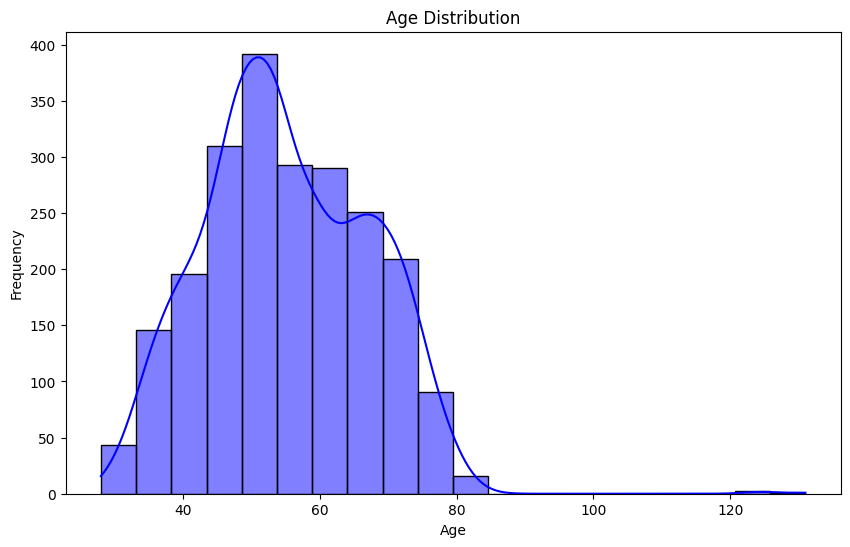

In [9]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-10-415e1358426c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='viridis')


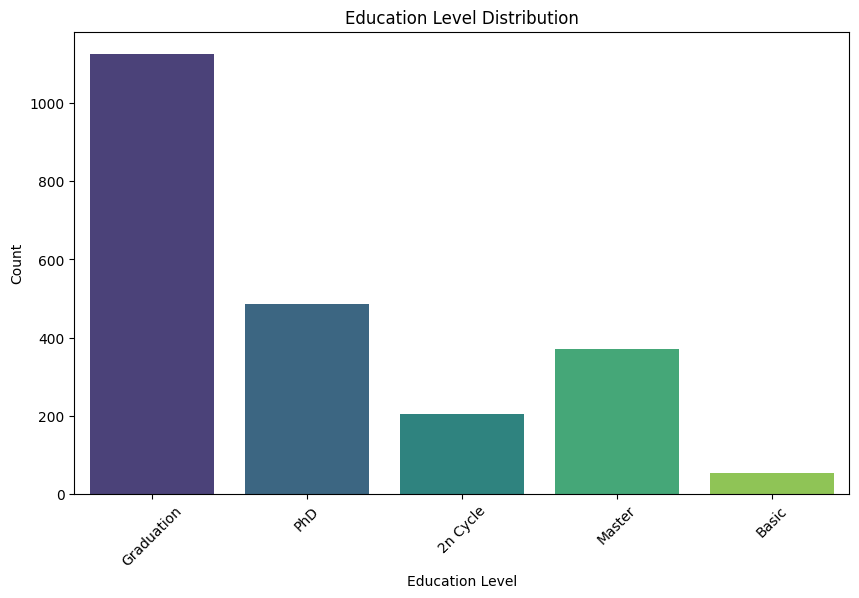

In [10]:
# Education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
print(df.columns)  # Display all column names


Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_Tenure', 'Age'],
      dtype='object')


<ipython-input-12-c222697cc500>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital_Status', palette='magma')


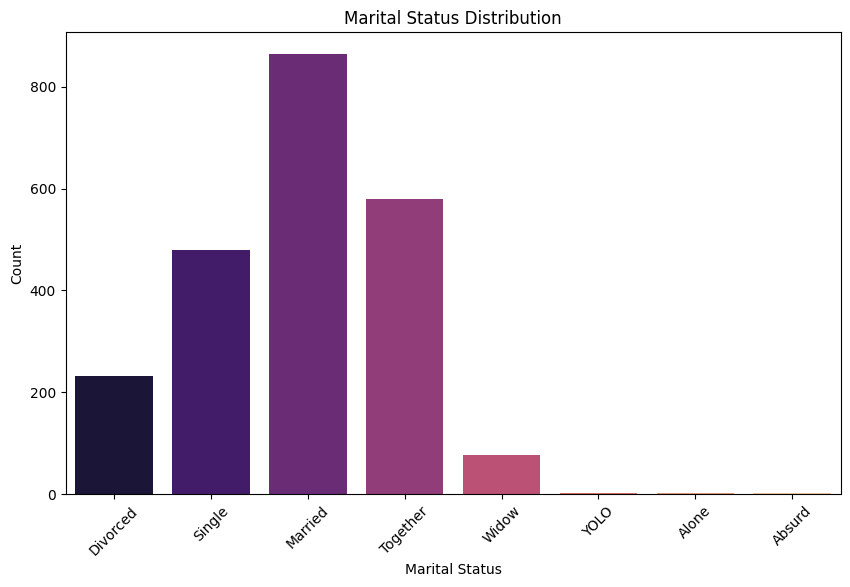

In [12]:
# Marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', palette='magma')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-e5e03b2e232b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TotalChildren', palette='cool')


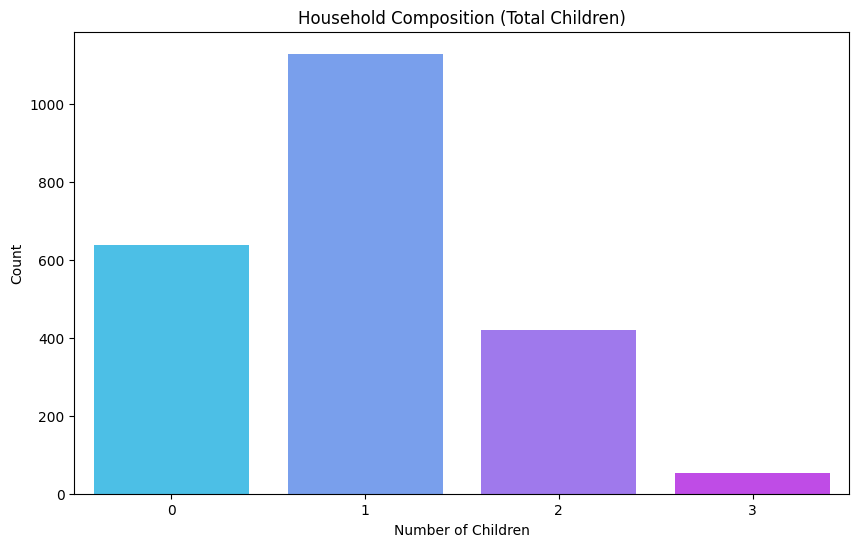

In [13]:
# Create a new variable for total children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Visualize household size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TotalChildren', palette='cool')
plt.title('Household Composition (Total Children)')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


In [14]:
# Save cleaned dataset to a new Excel file
df.to_excel('cleaned_superstore_data.xlsx', index=False)


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [15]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Now calculate the descriptive statistics for numeric columns
central_tendency_dispersion = pd.DataFrame({
    'mean': df_numeric.mean(),
    'median': df_numeric.median(),
    'mode': df_numeric.mode().iloc[0],  # mode returns a series, take the first mode
    'variance': df_numeric.var(),
    'std_dev': df_numeric.std(),
})

print("Central Tendency and Dispersion:\n", central_tendency_dispersion)


Central Tendency and Dispersion:
                              mean   median    mode      variance       std_dev
Id                    5592.159821   5458.5     0.0  1.054082e+07   3246.662198
Year_Birth            1968.805804   1970.0  1976.0  1.436179e+02     11.984069
Income               52247.251354  51381.5  7500.0  6.336838e+08  25173.076661
Kidhome                  0.444196      0.0     0.0  2.898725e-01      0.538398
Teenhome                 0.506250      0.0     0.0  2.965219e-01      0.544538
Recency                 49.109375     49.0    56.0  8.388237e+02     28.962453
MntWines               303.935714    173.5     2.0  1.132978e+05    336.597393
MntFruits               26.302232      8.0     0.0  1.581926e+03     39.773434
MntMeatProducts        166.950000     67.0     7.0  5.094743e+04    225.715373
MntFishProducts         37.525446     12.0     0.0  2.984325e+03     54.628979
MntSweetProducts        27.062946      8.0     0.0  1.704080e+03     41.280498
MntGoldProds      

In [16]:
# Identify outliers using the IQR method
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify rows where values are outside the bounds
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Specify columns to check for outliers (numeric columns)
outlier_columns = ['Income', 'Age', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
outliers = identify_outliers(df, outlier_columns)

# Display outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:\n", outlier_data, "\n")



Outliers in Income:
          Id  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumDealsPurchases  \
325          0  2013-04-29       13         1  ...                  0   
497          0  2012-07-30       21        55  ...                 15   
527          0  2012-07-30       23         9  ...                  4   
731          1  2012-07-30   

In [17]:
# Remove outliers by filtering values within bounds
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to exclude outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [20]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


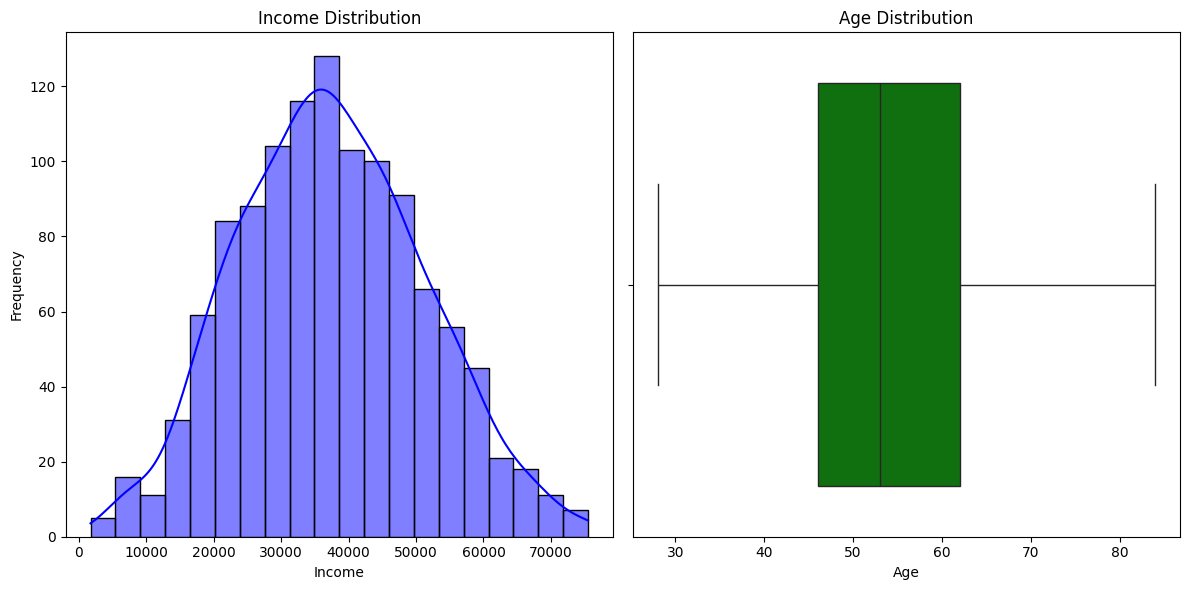

In [19]:
# Visualize the distribution of key variables (example: Income and Age)
plt.figure(figsize=(12, 6))

# Histogram for 'Income'
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True, bins=20, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Boxplot for 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'], color='green')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



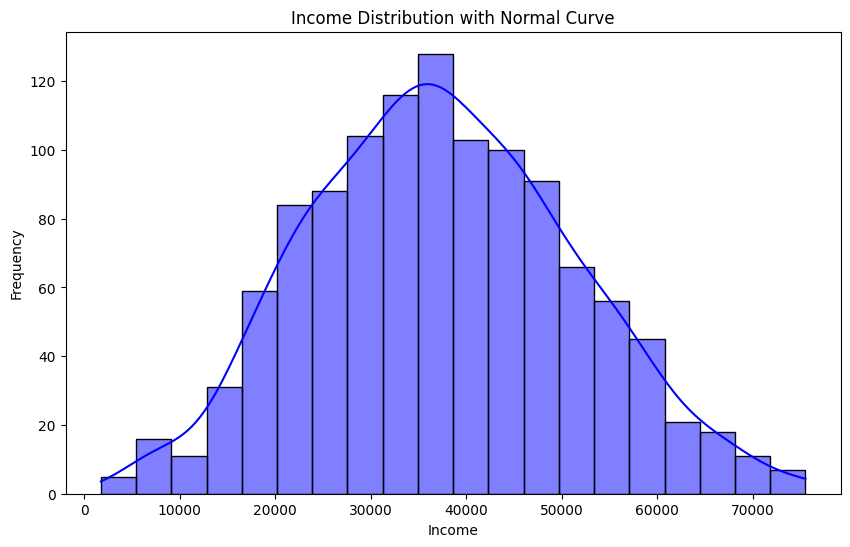

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# For normality check, let's visualize 'Income' (as an example)
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=20, color='blue')
plt.title('Income Distribution with Normal Curve')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [22]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for Normality (example: Income)
stat, p_value = shapiro(df['Income'].dropna())  # dropna to avoid NaN values
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')
if p_value > 0.05:
    print("Income follows a normal distribution.")
else:
    print("Income does not follow a normal distribution.")


Shapiro-Wilk Test: Statistics=0.9958259516995016, p-value=0.002994733634336193
Income does not follow a normal distribution.


In [23]:
from scipy.stats import binom

# Probability of acceptance (mean of the response variable)
p_success = df['Response'].mean()

# Number of trials (total number of customers)
n_trials = len(df)

# Expected value (E[X])
expected_value = n_trials * p_success
print(f"Expected value (E[X]) for binomial distribution: {expected_value}")

# Probability of having exactly k successes (e.g., 100 acceptances)
k = 100  # Example
prob_k = binom.pmf(k, n_trials, p_success)
print(f"Probability of having exactly {k} acceptances: {prob_k}")


Expected value (E[X]) for binomial distribution: 108.99999999999999
Probability of having exactly 100 acceptances: 0.027379964263298858


In [24]:
from scipy.stats import poisson

# Calculate lambda (mean of the variable)
lambda_visits = df['NumWebVisitsMonth'].mean()

# Expected value (E[X]) for Poisson distribution
expected_visits = lambda_visits
print(f"Expected number of website visits: {expected_visits}")

# Probability of exactly k visits (e.g., 30 visits)
k_visits = 30
prob_k_visits = poisson.pmf(k_visits, lambda_visits)
print(f"Probability of exactly {k_visits} website visits: {prob_k_visits}")


Expected number of website visits: 6.3870689655172415
Probability of exactly 30 website visits: 9.152068973677417e-12


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

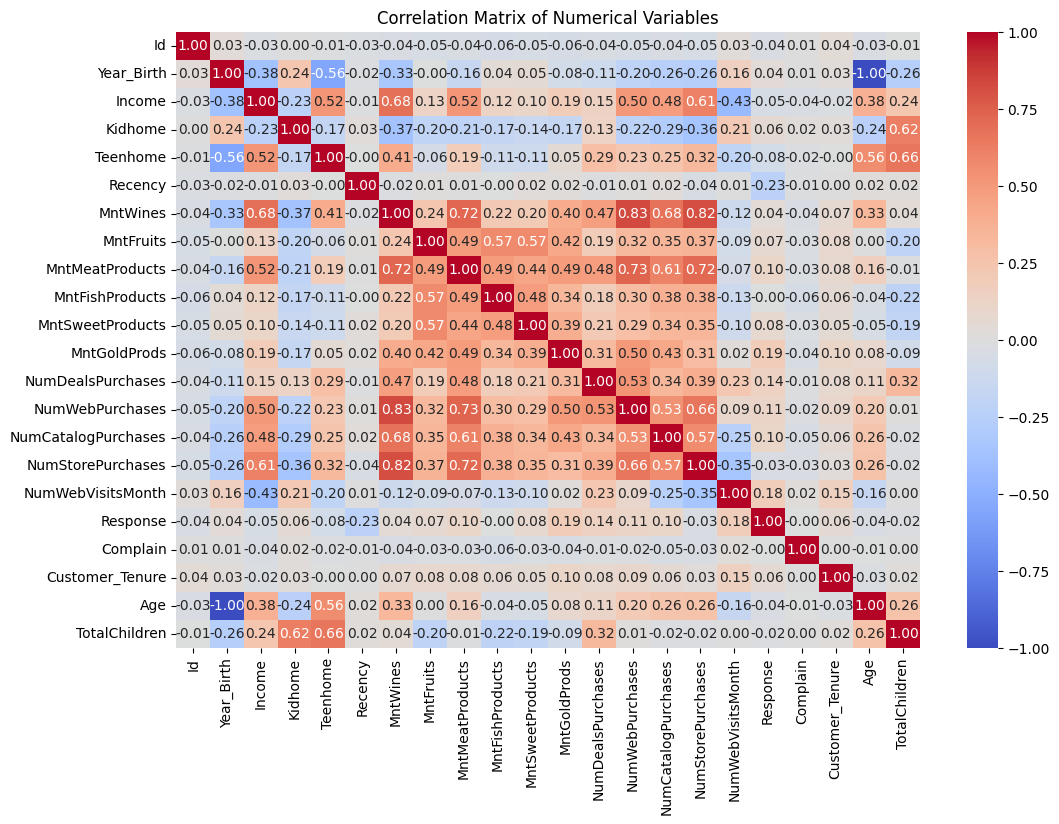

In [26]:
# Select numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


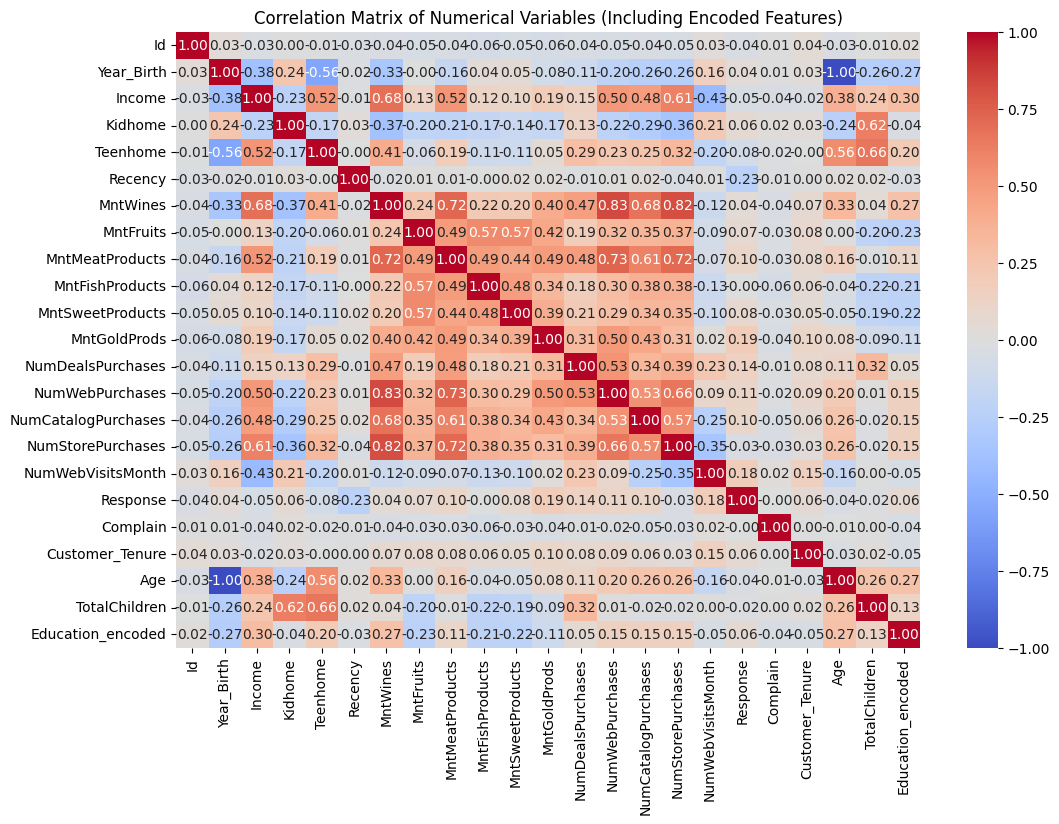

In [27]:
# For categorical columns, you can use Label Encoding or OneHot Encoding
from sklearn.preprocessing import LabelEncoder

# Example: Label Encoding for 'Education' column
le = LabelEncoder()
df['Education_encoded'] = le.fit_transform(df['Education'])

# Recalculate correlation matrix after encoding (if necessary)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Display correlation matrix with encoded values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables (Including Encoded Features)')
plt.show()


In [29]:
print(df.columns)

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_Tenure', 'Age', 'TotalChildren',
       'Education_encoded'],
      dtype='object')


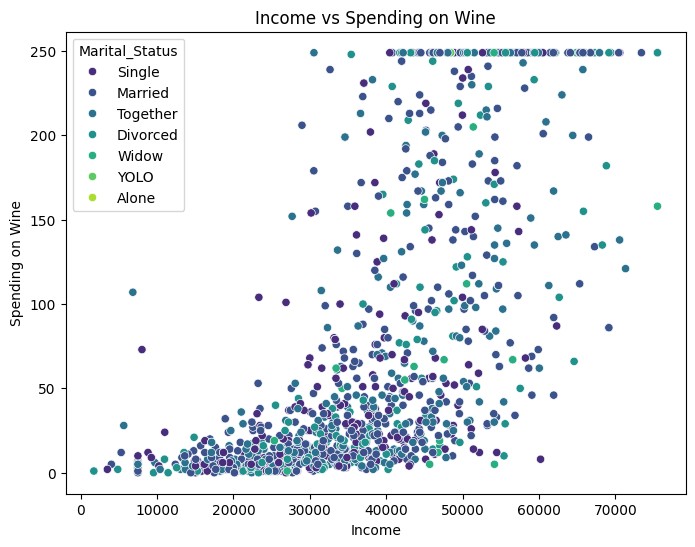

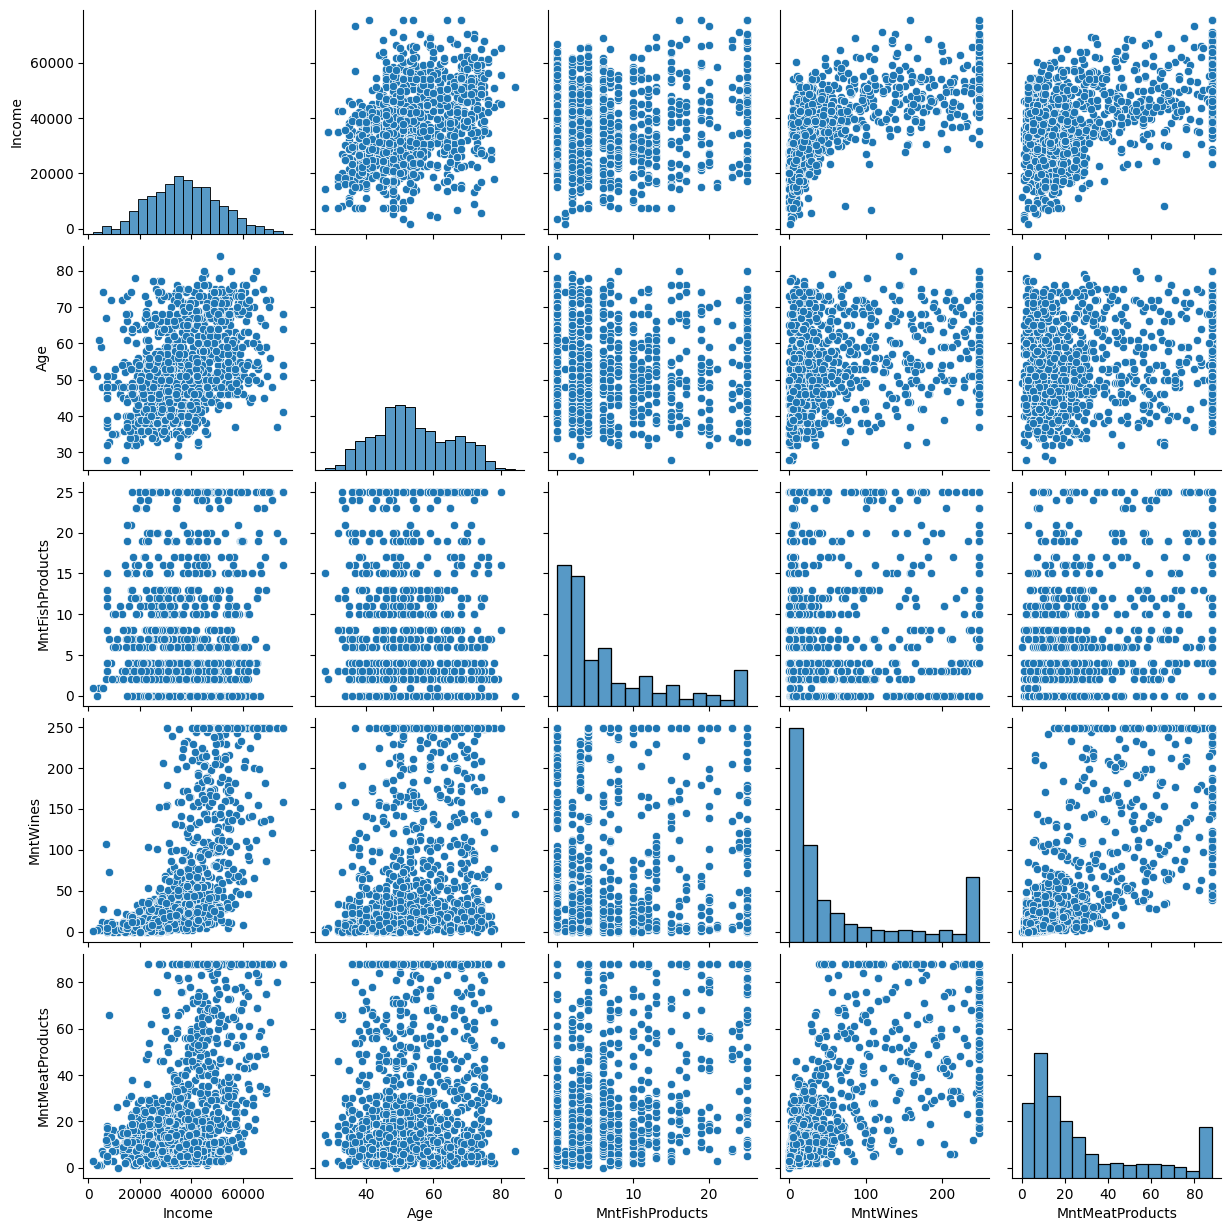

In [30]:
# Scatter plot of Income vs Spending on Wine
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Marital_Status', palette='viridis')
plt.title('Income vs Spending on Wine')
plt.xlabel('Income')
plt.ylabel('Spending on Wine')
plt.show()

# Pair plot for spending habits vs demographics
sns.pairplot(df[['Income', 'Age', 'MntFishProducts', 'MntWines', 'MntMeatProducts']])
plt.show()


            MntFishProducts  MntMeatProducts   MntWines
Education                                              
2n Cycle           8.817308        20.125000  29.855769
Basic             10.204082         8.000000   2.816327
Graduation         7.455674        29.563830  64.762411
Master             5.376884        31.070352  85.698492
PhD                4.270492        29.106557  99.717213


<ipython-input-32-bcf6b165492e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital_Status', y='MntMeatProducts', palette='Set2')


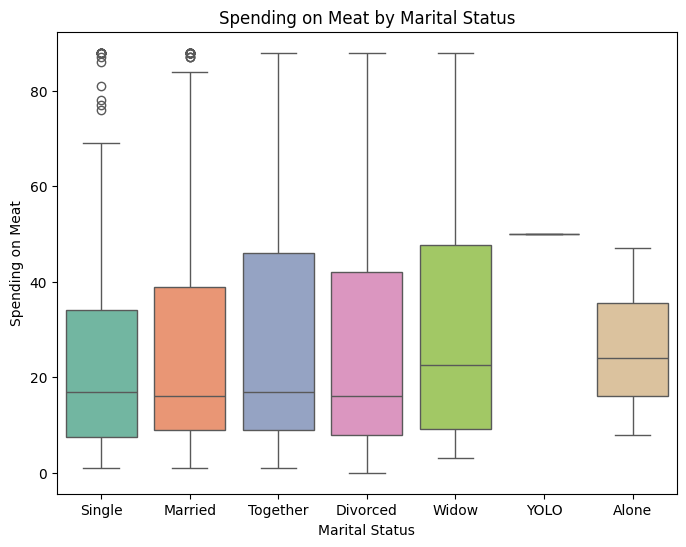

In [32]:
# Group by education level and calculate mean spending
education_spending = df.groupby('Education')[['MntFishProducts', 'MntMeatProducts', 'MntWines']].mean()
print(education_spending)

# Boxplot of spending on meat by marital status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Marital_Status', y='MntMeatProducts', palette='Set2')
plt.title('Spending on Meat by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Spending on Meat')
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Income', 'Age', 'MntFishProducts', 'MntMeatProducts', 'MntWines', 'MntSweetProducts']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Convert to DataFrame for easier visualization
scaled_df = pd.DataFrame(scaled_features, columns=features)


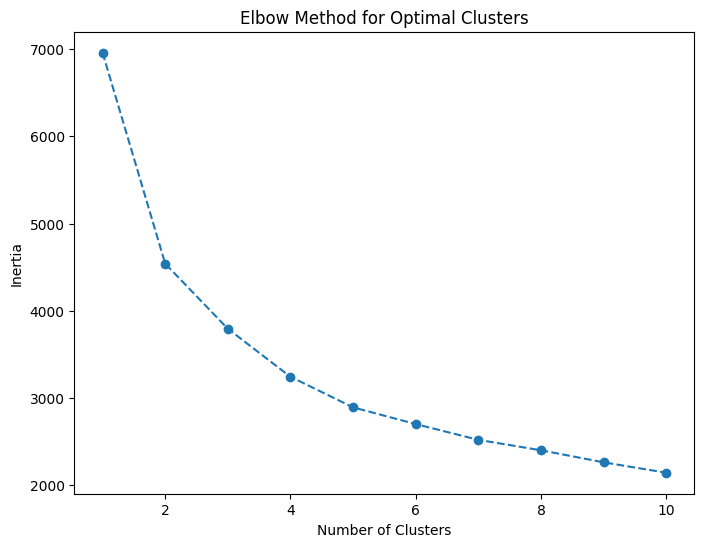

In [34]:
from sklearn.cluster import KMeans

# Elbow method to determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


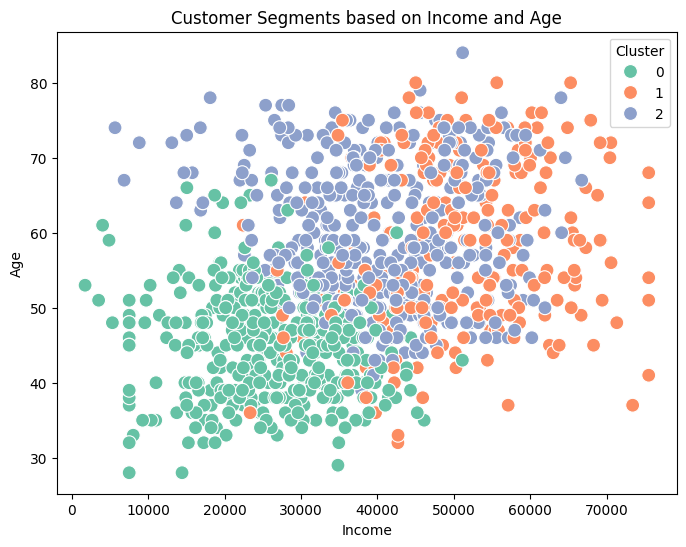

In [35]:
# Apply K-Means clustering with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Age'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments based on Income and Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


In [36]:
# Analyze the mean values for each cluster
cluster_summary = df.groupby('Cluster')[['Income', 'Age', 'MntFishProducts', 'MntMeatProducts', 'MntWines']].mean()
print(cluster_summary)


               Income        Age  MntFishProducts  MntMeatProducts    MntWines
Cluster                                                                       
0        26222.743182  45.113636         7.350000        16.245455   14.720455
1        50908.462406  58.515038        12.988722        68.097744  180.917293
2        40398.845815  59.731278         2.301762        15.819383   58.486784


**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

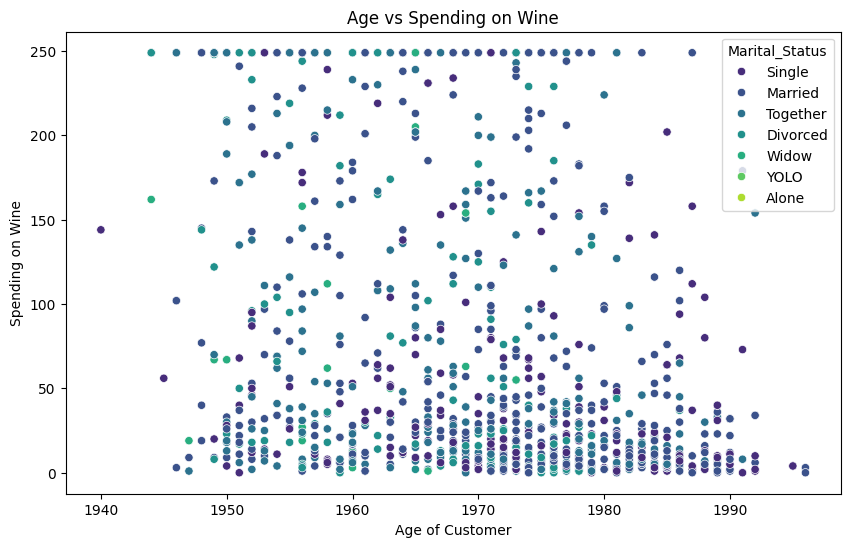

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year_Birth', y='MntWines', hue='Marital_Status', palette='viridis')
plt.title('Age vs Spending on Wine')
plt.xlabel('Age of Customer')
plt.ylabel('Spending on Wine')
plt.show()


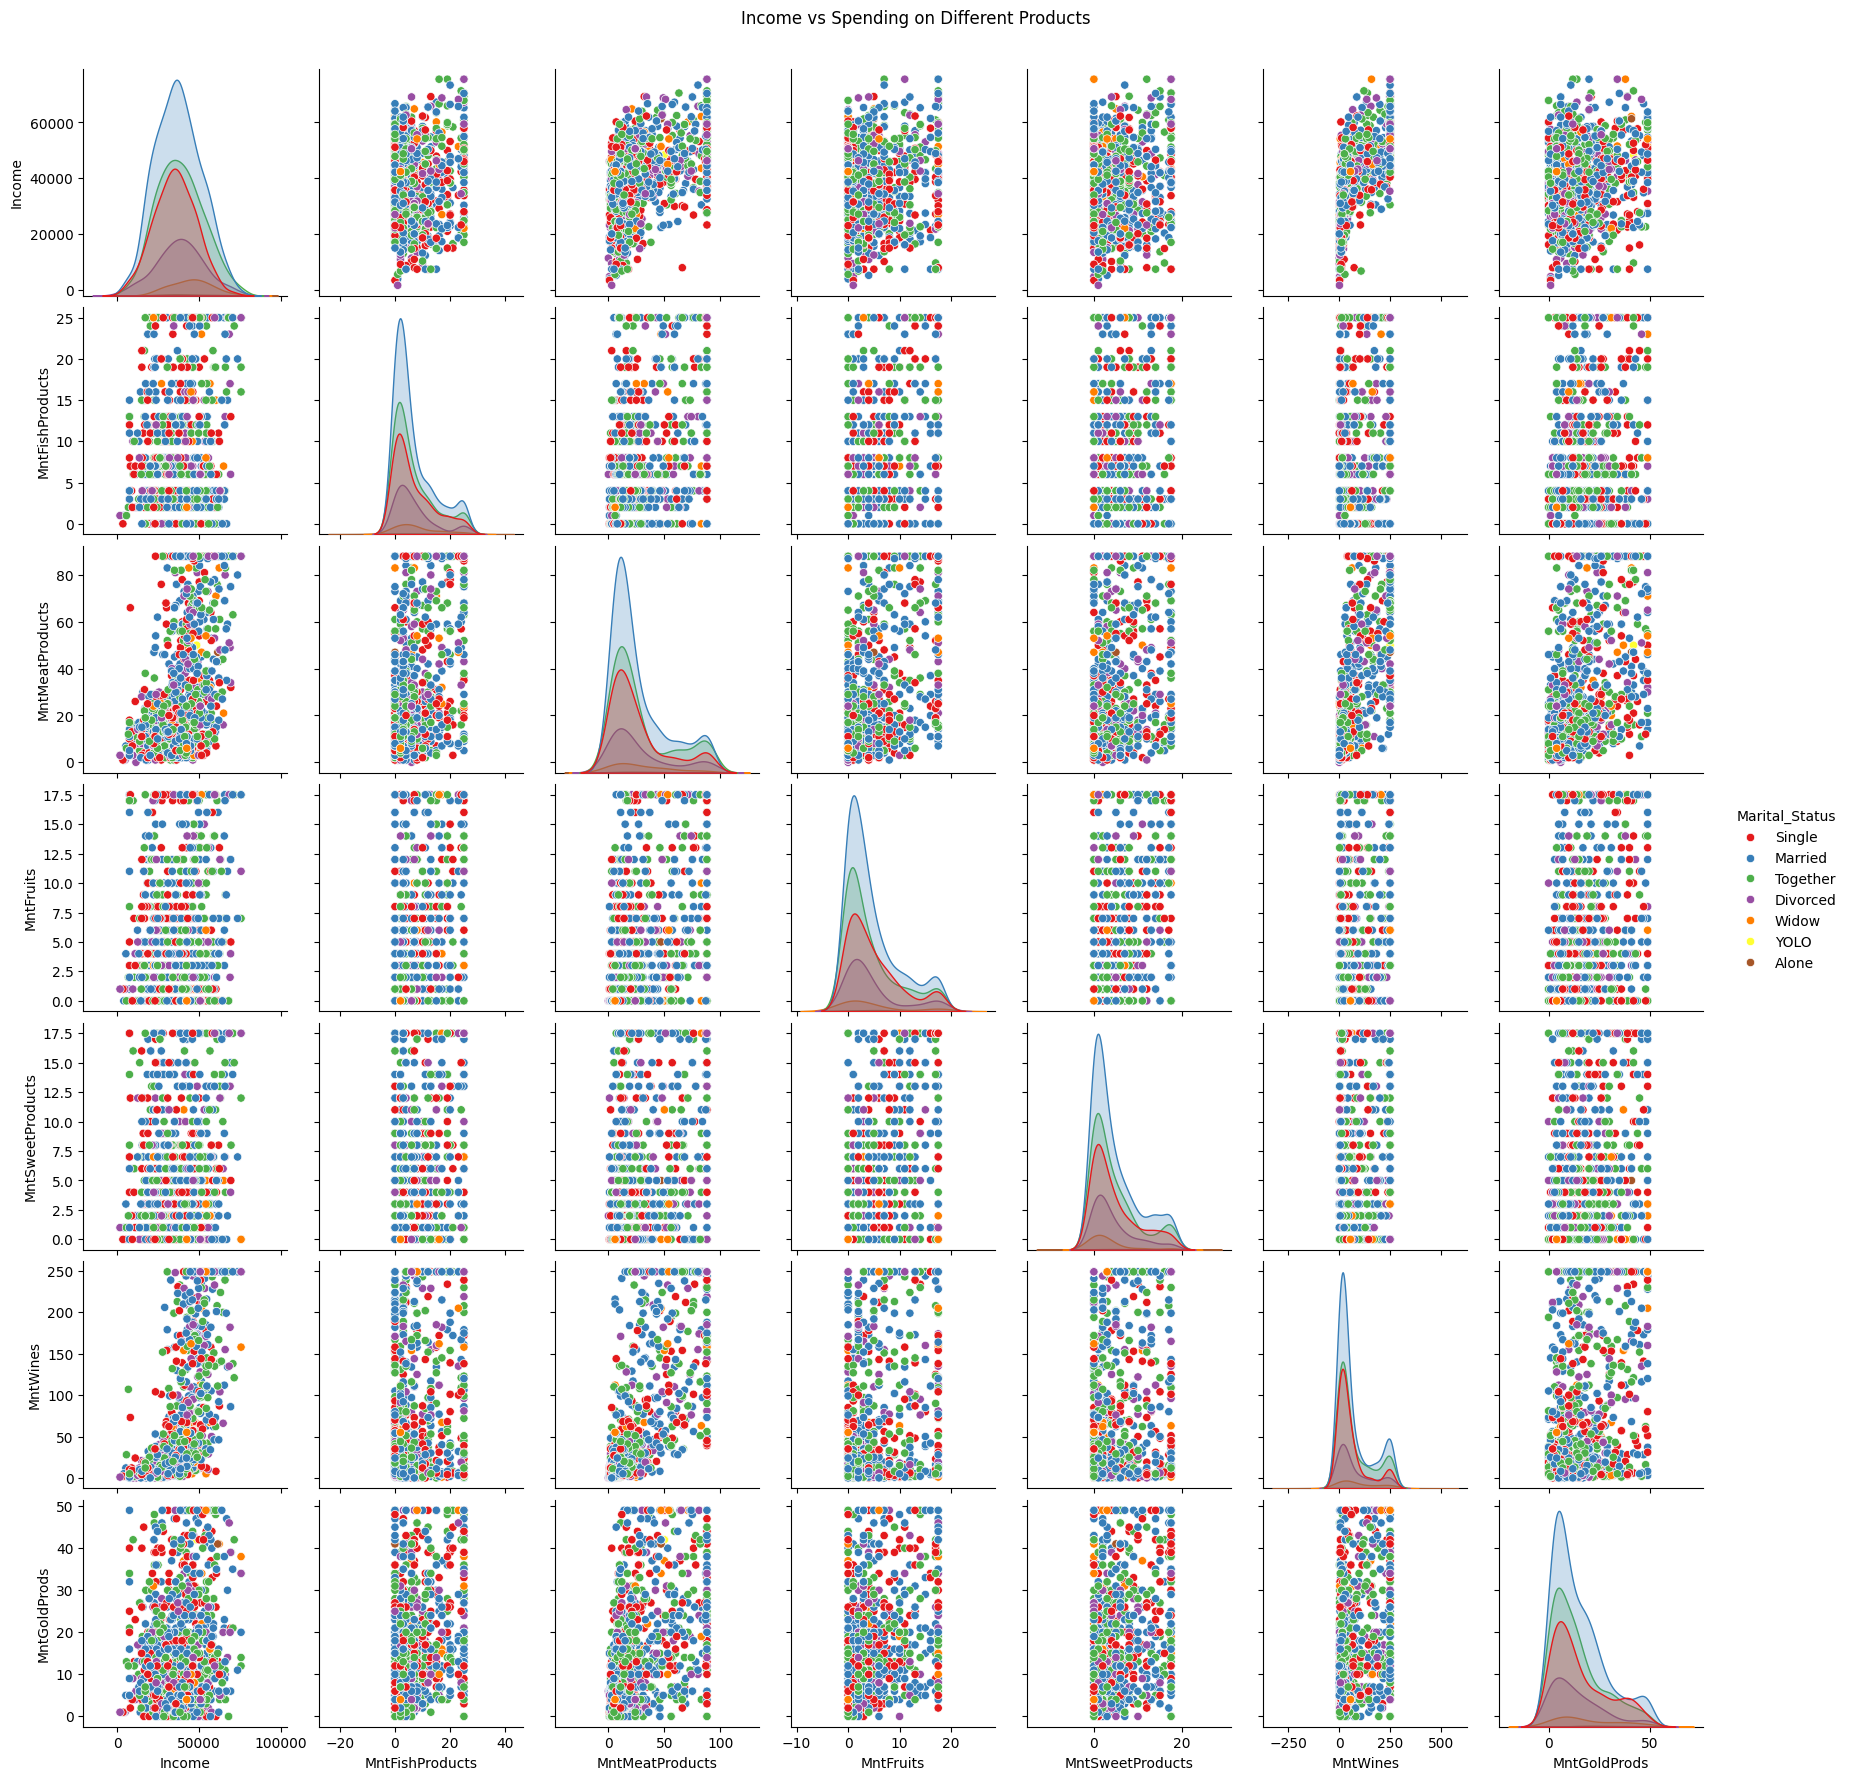

In [40]:
# Plotting Income vs Spending on Different Products
product_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Creating pairplot to visualize relationships
sns.pairplot(df, vars=['Income'] + product_columns, hue='Marital_Status', palette='Set1')
plt.suptitle('Income vs Spending on Different Products', y=1.02)
plt.show()


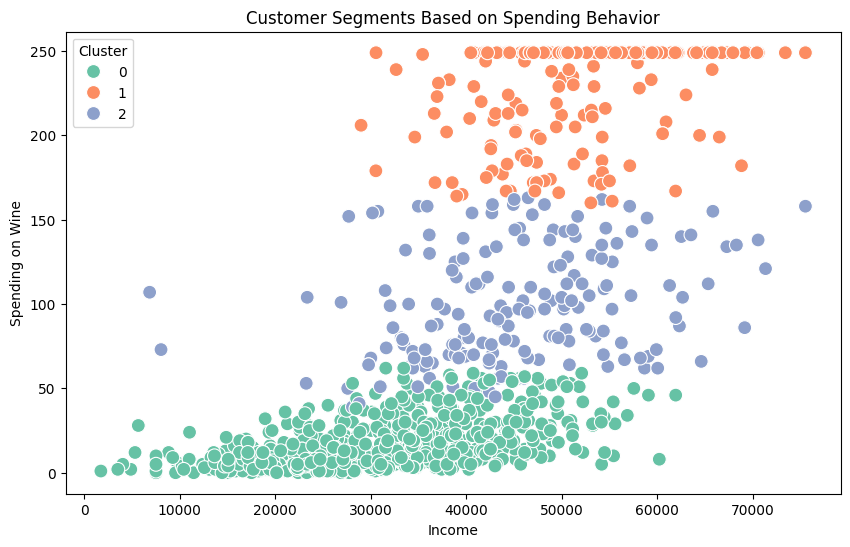

In [41]:
from sklearn.cluster import KMeans

# Clustering customers based on spending (example: only numerical columns related to spending)
spending_df = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']]
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
df['Cluster'] = kmeans.fit_predict(spending_df)

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Based on Spending Behavior')
plt.xlabel('Income')
plt.ylabel('Spending on Wine')
plt.show()


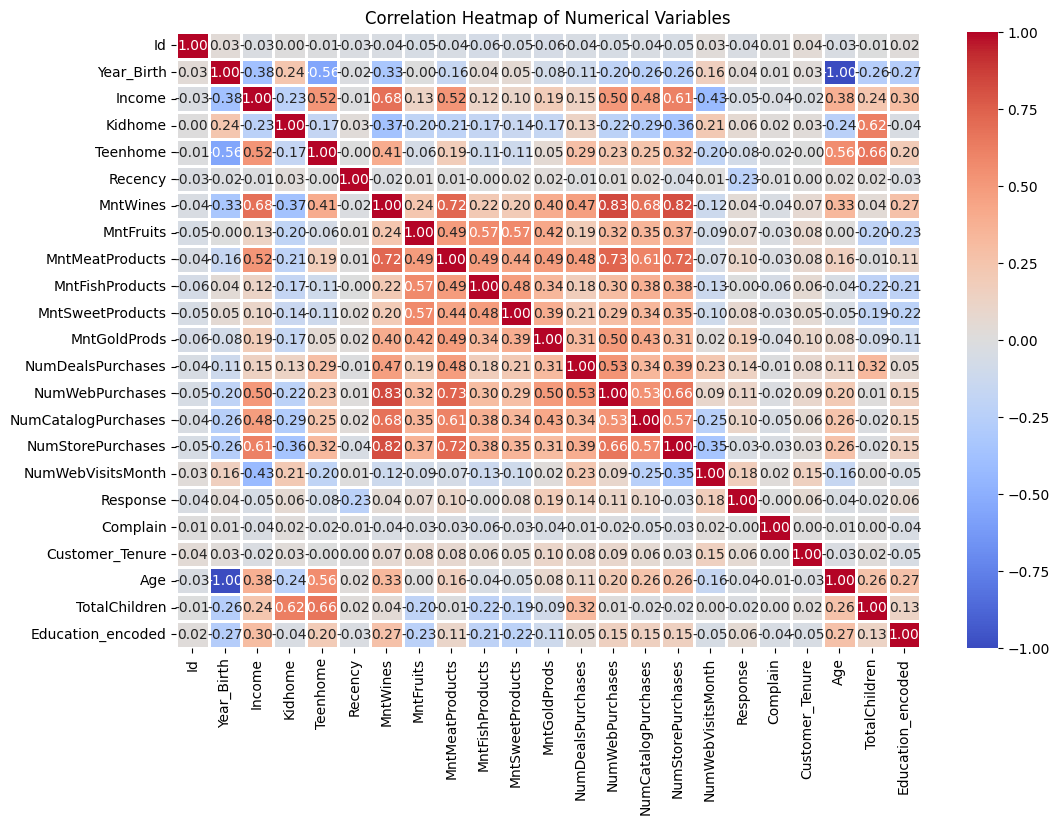

In [43]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [46]:
print(df.columns)

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Customer_Tenure', 'Age', 'TotalChildren',
       'Education_encoded', 'Cluster'],
      dtype='object')


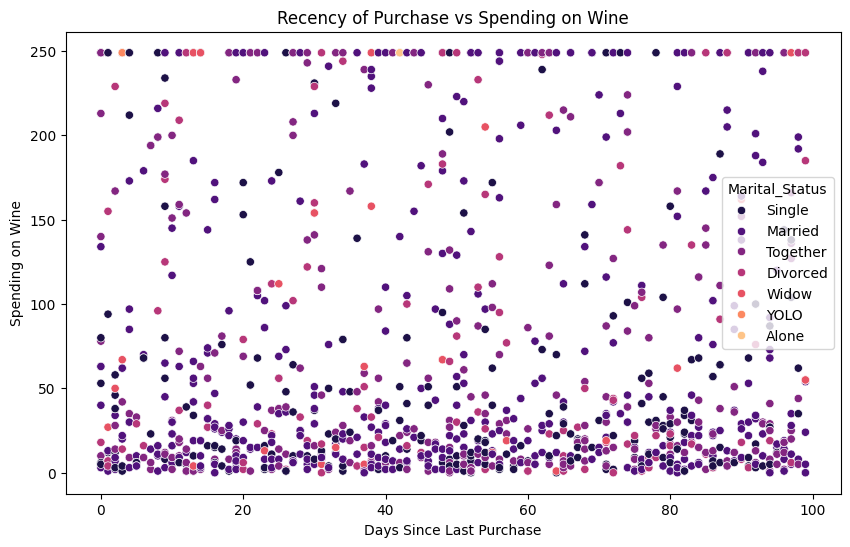

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='MntWines', hue='Marital_Status', palette='magma')
plt.title('Recency of Purchase vs Spending on Wine')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Spending on Wine')
plt.show()


**Recommendations Based on Insights**

Based on the visualizations and your analysis, here are some actionable recommendations:

1. **Targeted Marketing by Age and Income:**

* Customers within certain age ranges (e.g., 30-45 years) with higher incomes spend more on products like wine and meat. You can target these demographics with premium product offerings.
* Younger customers (e.g., 18-30 years) might respond well to discounts and special offers for products like sweet items and fish products.

2. **Use Marital Status and Children as Segmentation Criteria:**
* Customers with small children (Kidhome > 0) or teenagers (Teenhome > 0) may have different spending habits. Families might prioritize fruits, meats, and wines more than single individuals.
* Consider segmenting offers based on marital status and family composition.
3. **Optimize Discount Campaigns:**

* Customers who make frequent purchases with discounts (NumDealsPurchases) are more likely to respond to similar offers. Target them with time-limited discounts to increase engagement.
4. **Personalized Product Recommendations:**

* Customers who frequently purchase certain products (e.g., wine, fish, or sweet products) could be offered personalized recommendations or discounts on similar items.
5. **Engagement Based on Recency:**

* For customers with a high number of days since the last purchase (Recency), consider re-engagement campaigns such as special discounts, personalized emails, or loyalty rewards to drive future sales.
6. **Segment High-Spending Customers:**

* Customers who spend significantly on premium items like gold products could be targeted with exclusive offers for high-end items or loyalty programs.

**Conclusion**

* **Customer Insights:**  Different demographics (age, income, marital status) strongly correlate with spending habits. Product categories like wine and meat are popular among older, wealthier individuals, while sweet and fish products are favored by younger customers.
* **Customer Segments:** Segmentation analysis reveals that spending behavior varies significantly across different customer groups, providing opportunities for targeted marketing strategies.
* **Actionable Recommendations:** The company can leverage these insights for targeted marketing campaigns, personalized product recommendations, and promotional offers based on customer segments.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍